In [1]:
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install scikeras
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f0cf38410e561c765cdd5346e425cf742cb2f31f3fb3dfeff93ea53

In [2]:
from typing import List
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import random
from matplotlib import pyplot
from matplotlib.colors import ListedColormap

import os, shutil
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    LeaveOneOut,
    cross_val_score,
    train_test_split,
)

import tensorflow as tf
from tensorflow import keras
import scikeras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, AdamW, Adadelta, Adagrad, Adamax, Adafactor, Nadam, Ftrl
from keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.initializers import Zeros, Ones

import requests

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/Spaceship Titanic/kaggle.json" ~/.kaggle/
!pip install kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           5611        134  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          12002        224  1.0              
computingvictor/zillow-market-analysis-and-real-estate-sales-data  🏠 Airbnb Market Analysis & Real Estate Sales Data    3MB  2024-01-26 16:29:34            835         31  1.0              
mrsimple07/obesity-prediction                     

In [5]:
DATA_PATH = "/content/drive/MyDrive/Spaceship Titanic/Dati/"
IMAGE_PATH = "/content/drive/MyDrive/Spaceship Titanic/Immagini/Tecniche di ML/"
OUTPUT_PATH = "kaggle_submissions/"

In [6]:
dataset_13 = pd.read_csv(DATA_PATH + "train_13.csv")
train_13, y_train_13 = dataset_13.drop(columns=['Unnamed: 0','Transported']), dataset_13.Transported
train_13

,gggg,Deck,Cabin_num,Side,HomePlanet,Destination,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,0,1,0,0,39.0,0.0,0.0,0.0,0.0,0.0
1,2,5,0,1,0,0,0,24.0,109.0,9.0,25.0,549.0,44.0
2,3,0,0,1,1,0,0,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,0,0,1,1,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,5,1,1,0,0,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,0,98,0,1,1,0,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278,6,1499,1,0,2,1,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279,6,1500,1,0,0,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280,4,608,1,1,1,0,32.0,0.0,1049.0,0.0,353.0,3235.0


In [7]:
dataset_22 = pd.read_csv(DATA_PATH + "train_22.csv")
train_22, y_train_22 = dataset_22.drop(columns=['Unnamed: 0','Transported']), dataset_22.Transported
train_22

,gggg,Deck_B,Deck_C,Deck_E,Deck_F,Deck_G,Cabin_num,Side_P,Side_S,HomePlanet_Earth,...,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,39.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,1,0,0,0,1,1,...,0,0,1,0,24.0,109.0,9.0,25.0,549.0,44.0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,0,0,0,1,0,1,0,1,1,...,0,0,1,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,0,0,0,0,0,98,1,0,0,...,1,0,0,0,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278,0,0,0,0,1,1499,0,1,1,...,0,1,0,1,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279,0,0,0,0,1,1500,0,1,1,...,0,0,1,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280,0,0,1,0,0,608,0,1,0,...,1,0,0,0,32.0,0.0,1049.0,0.0,353.0,3235.0


In [8]:
X_13, test_13, y_13, y_test_13 = train_test_split(train_13, y_train_13, test_size=0.33, train_size=0.67)
X_22, test_22, y_22, y_test_22 = train_test_split(train_22, y_train_22, test_size=0.33, train_size=0.67)

In [9]:
def create_neural_network(input, add_hlayer, n1, n2, lr):
  myModel = Sequential()
  #8: n di neuroni, input_shape : n di variabili, 'relu': regressione lineare
  myModel.add(Dense(n1, input_shape=(input,), activation='relu'))
  if(add_hlayer == True):
    myModel.add(Dense(n2, activation='relu'))
  myModel.add(Dense(1, activation='sigmoid'))

  # compile the keras myModel
  opt = keras.optimizers.Adam(learning_rate=lr)
  myModel.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return myModel

In [10]:
def evaluate_nn(neural_network, X, y, test, y_test):
  train_loss, train_acc = neural_network.evaluate(X, y, verbose=0)
  test_loss, test_acc = neural_network.evaluate(test, y_test, verbose=0)
  print('Train loss: %.4f, Train accuracy: %.4f' % (train_loss, train_acc))
  print('Test loss: %.4f, Test accuracy: %.4f' % (test_loss, test_acc))

In [20]:
def show_loss_accuracy(history, bs, sl, el, sa, ea, name_nn):
  pyplot.rcParams['figure.figsize'] = [10, 8]

  # plot loss during training
  pyplot.subplot(211)
  pyplot.title('Loss '+str(name_nn))
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.axis([1, bs, sl, el])
  pyplot.grid(True)

  # plot accuracy during training
  pyplot.subplot(212)
  pyplot.title('Accuracy '+str(name_nn))
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='test')
  pyplot.legend()
  pyplot.axis([1, bs, sa, ea])
  pyplot.grid(True)

  pyplot.subplots_adjust(hspace=0.3)

  pyplot.tight_layout()
  if(not os.path.exists(IMAGE_PATH + "NN_" + str(name_nn) + ".png")):
    pyplot.savefig(IMAGE_PATH + "NN_" + str(name_nn) + ".png", format="png")

  pyplot.show()

Addestramento delle Reti Neurali sul dataset train_13

In [ ]:
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

nn_1 = create_neural_network(13, False, 30, 0, 0.001)
history_1 = nn_1.fit(X_13, y_13, validation_data=(test_13, y_test_13), epochs=20, batch_size=5, callbacks=[checkpoint])
nn_1 = keras.models.load_model(checkpoint_filepath)

Epoch 1/20
1149/1165 [============================>.] - ETA: 0s - loss: 64.3758 - accuracy: 0.6630
Epoch 1: val_accuracy improved from -inf to 0.71907, saving model to /tmp/ckpt/checkpoint.model.keras
1165/1165 [==============================] - 3s 2ms/step - loss: 63.5721 - accuracy: 0.6640 - val_loss: 3.5712 - val_accuracy: 0.7191
Epoch 2/20
1161/1165 [============================>.] - ETA: 0s - loss: 4.1514 - accuracy: 0.7032
Epoch 2: val_accuracy improved from 0.71907 to 0.76020, saving model to /tmp/ckpt/checkpoint.model.keras
1165/1165 [==============================] - 3s 3ms/step - loss: 4.1482 - accuracy: 0.7033 - val_loss: 3.5833 - val_accuracy: 0.7602
Epoch 3/20
1163/1165 [============================>.] - ETA: 0s - loss: 3.8552 - accuracy: 0.7027
Epoch 3: val_accuracy did not improve from 0.76020
1165/1165 [==============================] - 3s 3ms/step - loss: 3.8497 - accuracy: 0.7030 - val_loss: 2.5690 - val_accuracy: 0.6908
Epoch 4/20
1151/1165 [=========================

In [ ]:
evaluate_nn(nn_1, X_13, y_13, test_13, y_test_13)

Train loss: 1.8747, Train accuracy: 0.7783
Test loss: 2.3593, Test accuracy: 0.7787


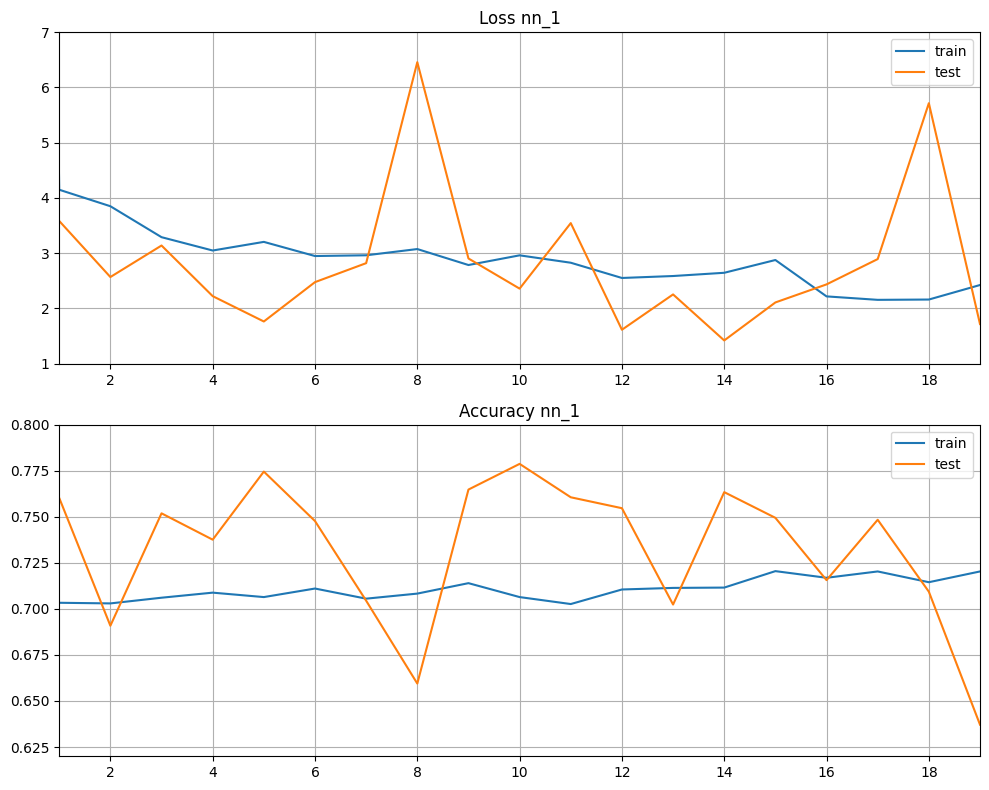

In [ ]:
show_loss_accuracy(history_1, 19, 1, 7, 0.62, 0.8, 'nn_1')

In [ ]:
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

nn_2 = create_neural_network(13, False, 5, 0, 0.01)
history_2 = nn_2.fit(X_13, y_13, validation_data=(test_13, y_test_13), epochs=50, batch_size=50, callbacks=[checkpoint])
nn_2 = keras.models.load_model(checkpoint_filepath)

Epoch 1/50
114/117 [============================>.] - ETA: 0s - loss: 8.6565 - accuracy: 0.5428 
Epoch 1: val_accuracy improved from -inf to 0.55106, saving model to /tmp/ckpt/checkpoint.model.keras
117/117 [==============================] - 1s 4ms/step - loss: 8.4867 - accuracy: 0.5434 - val_loss: 0.7934 - val_accuracy: 0.5511
Epoch 2/50
104/117 [=========================>....] - ETA: 0s - loss: 0.7434 - accuracy: 0.5581
Epoch 2: val_accuracy improved from 0.55106 to 0.59254, saving model to /tmp/ckpt/checkpoint.model.keras
117/117 [==============================] - 0s 4ms/step - loss: 0.7383 - accuracy: 0.5608 - val_loss: 0.7069 - val_accuracy: 0.5925
Epoch 3/50
114/117 [============================>.] - ETA: 0s - loss: 0.6937 - accuracy: 0.5895
Epoch 3: val_accuracy did not improve from 0.59254
117/117 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5922 - val_loss: 0.6733 - val_accuracy: 0.5591
Epoch 4/50
105/117 [=========================>....] - ETA: 0

In [ ]:
evaluate_nn(nn_2, X_13, y_13, test_13, y_test_13)

Train loss: 0.4771, Train accuracy: 0.7893
Test loss: 0.4785, Test accuracy: 0.7891


In [ ]:
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

nn_3 = create_neural_network(13, True, 25, 8, 0.002)
history_3 = nn_3.fit(X_13, y_13, validation_data=(test_13, y_test_13), epochs=100, batch_size=20, callbacks=[checkpoint])
nn_3 = keras.models.load_model(checkpoint_filepath)

Epoch 1/100
279/292 [===========================>..] - ETA: 0s - loss: 26.3447 - accuracy: 0.6167
Epoch 1: val_accuracy improved from -inf to 0.61694, saving model to /tmp/ckpt/checkpoint.model.keras
292/292 [==============================] - 2s 3ms/step - loss: 25.2844 - accuracy: 0.6154 - val_loss: 1.7866 - val_accuracy: 0.6169
Epoch 2/100
289/292 [============================>.] - ETA: 0s - loss: 1.4216 - accuracy: 0.6042
Epoch 2: val_accuracy did not improve from 0.61694
292/292 [==============================] - 1s 3ms/step - loss: 1.4225 - accuracy: 0.6035 - val_loss: 1.1684 - val_accuracy: 0.5831
Epoch 3/100
288/292 [============================>.] - ETA: 0s - loss: 0.9073 - accuracy: 0.5708
Epoch 3: val_accuracy did not improve from 0.61694
292/292 [==============================] - 1s 3ms/step - loss: 0.9101 - accuracy: 0.5702 - val_loss: 1.0082 - val_accuracy: 0.5699
Epoch 4/100
266/292 [==========================>...] - ETA: 0s - loss: 0.7367 - accuracy: 0.5602
Epoch 4: val_

In [ ]:
evaluate_nn(nn_3, X_13, y_13, test_13, y_test_13)

Train loss: 0.4879, Train accuracy: 0.7931
Test loss: 0.5194, Test accuracy: 0.7937


In [ ]:
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

nn_4 = create_neural_network(13, True, 40, 20, 0.003)
history_4 = nn_4.fit(X_13, y_13, validation_data=(test_13, y_test_13), epochs=150, batch_size=30, callbacks=[checkpoint])
nn_4 = keras.models.load_model(checkpoint_filepath)

Epoch 1/150
183/195 [===========================>..] - ETA: 0s - loss: 23.0906 - accuracy: 0.6783
Epoch 1: val_accuracy improved from -inf to 0.77065, saving model to /tmp/ckpt/checkpoint.model.keras
195/195 [==============================] - 1s 4ms/step - loss: 22.2549 - accuracy: 0.6817 - val_loss: 5.4438 - val_accuracy: 0.7707
Epoch 2/150
175/195 [=========================>....] - ETA: 0s - loss: 8.1931 - accuracy: 0.6990
Epoch 2: val_accuracy improved from 0.77065 to 0.77762, saving model to /tmp/ckpt/checkpoint.model.keras
195/195 [==============================] - 1s 3ms/step - loss: 8.5778 - accuracy: 0.6973 - val_loss: 5.9434 - val_accuracy: 0.7776
Epoch 3/150
175/195 [=========================>....] - ETA: 0s - loss: 4.7474 - accuracy: 0.7183
Epoch 3: val_accuracy did not improve from 0.77762
195/195 [==============================] - 0s 2ms/step - loss: 5.1924 - accuracy: 0.7105 - val_loss: 12.5880 - val_accuracy: 0.6943
Epoch 4/150
186/195 [===========================>..] - 

In [ ]:
evaluate_nn(nn_4, X_13, y_13, test_13, y_test_13)

Train loss: 0.4236, Train accuracy: 0.8000
Test loss: 0.4600, Test accuracy: 0.7999


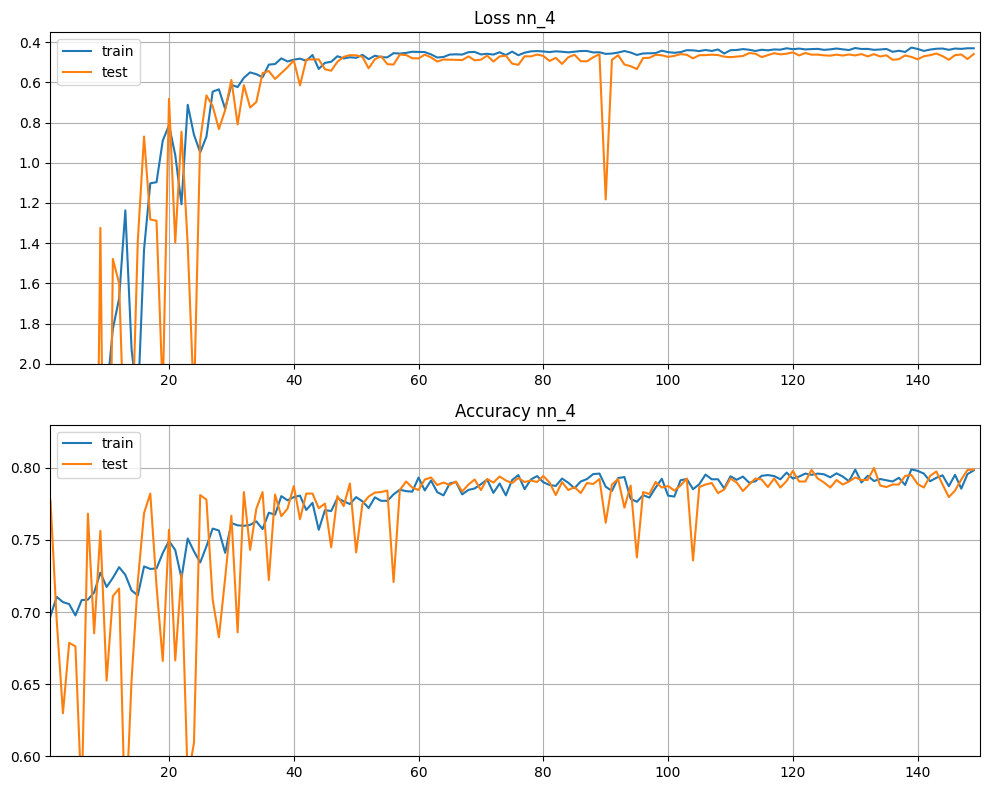

In [ ]:
show_loss_accuracy(history_4, 150, 2, 0.35, 0.6, 0.83, 'nn_4')

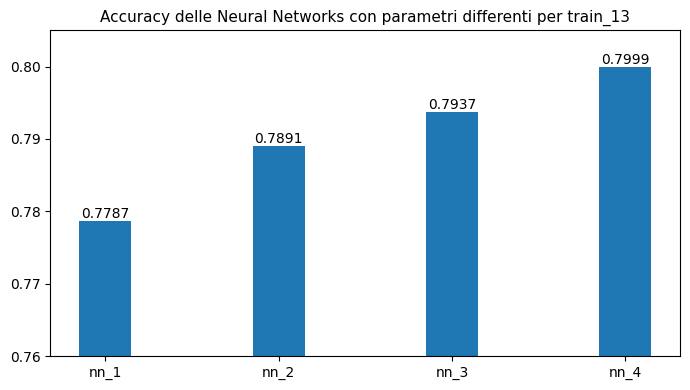

In [ ]:
loss_nn1, acc_nn1 = nn_1.evaluate(test_13, y_test_13, verbose=0)
loss_nn2, acc_nn2 = nn_2.evaluate(test_13, y_test_13, verbose=0)
loss_nn3, acc_nn3 = nn_3.evaluate(test_13, y_test_13, verbose=0)
loss_nn4, acc_nn4 = nn_4.evaluate(test_13, y_test_13, verbose=0)

data_13 = [['nn_1',acc_nn1,loss_nn1], ['nn_2',acc_nn2,loss_nn2], ['nn_3',acc_nn3,loss_nn3], ['nn_4',acc_nn4,loss_nn4]]
df_nn_13 = pd.DataFrame(data_13, columns=['Type of NN', 'Accuracy', 'Loss'])

fig, ax = plt.subplots(figsize=(7,4))
bar_container = ax.bar(df_nn_13['Type of NN'], np.round(df_nn_13['Accuracy'],4), width=0.3)
ax.set_title(label='Accuracy delle Neural Networks con parametri differenti per train_13', fontsize=11)
ax.set_ylim(0.76, 0.805)
ax.bar_label(bar_container)

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "NN_acc_13.png")):
  plt.savefig(IMAGE_PATH + "NN_acc_13.png", format="png")

plt.show()

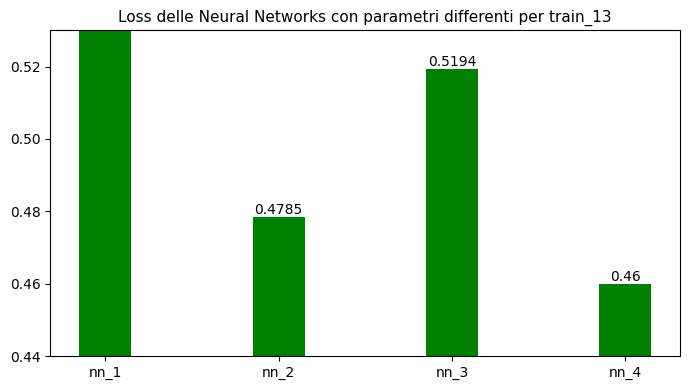

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
bar_container = ax.bar(df_nn_13['Type of NN'], np.round(df_nn_13['Loss'],4), color='g', width=0.3)
ax.set_title(label='Loss delle Neural Networks con parametri differenti per train_13', fontsize=11)
ax.set_ylim(0.44, 0.53)
ax.bar_label(bar_container)

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "NN_loss_13.png")):
  plt.savefig(IMAGE_PATH + "NN_loss_13.png", format="png")

plt.show()

CONCLUSIONE per train_13: la Rete Neurale migliore è nn_4

Addestramento delle Reti Neurali sul dataset train_22

In [ ]:
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

nn_5 = create_neural_network(22, False, 70, 0, 0.001)
history_5 = nn_5.fit(X_22, y_22, validation_data=(test_22, y_test_22), epochs=20, batch_size=5, callbacks=[checkpoint])
nn_5 = keras.models.load_model(checkpoint_filepath)

Epoch 1/20
1147/1165 [============================>.] - ETA: 0s - loss: 14.9272 - accuracy: 0.6886
Epoch 1: val_accuracy improved from -inf to 0.76264, saving model to /tmp/ckpt/checkpoint.model.keras
1165/1165 [==============================] - 5s 4ms/step - loss: 14.7360 - accuracy: 0.6904 - val_loss: 4.4023 - val_accuracy: 0.7626
Epoch 2/20
1140/1165 [============================>.] - ETA: 0s - loss: 6.0673 - accuracy: 0.7107
Epoch 2: val_accuracy did not improve from 0.76264
1165/1165 [==============================] - 3s 3ms/step - loss: 6.0311 - accuracy: 0.7121 - val_loss: 4.1715 - val_accuracy: 0.7100
Epoch 3/20
1152/1165 [============================>.] - ETA: 0s - loss: 4.7526 - accuracy: 0.7120
Epoch 3: val_accuracy did not improve from 0.76264
1165/1165 [==============================] - 3s 2ms/step - loss: 4.7319 - accuracy: 0.7124 - val_loss: 4.9782 - val_accuracy: 0.7222
Epoch 4/20
1157/1165 [============================>.] - ETA: 0s - loss: 4.4334 - accuracy: 0.7191
Epo

In [ ]:
evaluate_nn(nn_5, X_22, y_22, test_22, y_test_22)

Train loss: 1.2903, Train accuracy: 0.7871
Test loss: 1.5422, Test accuracy: 0.7766


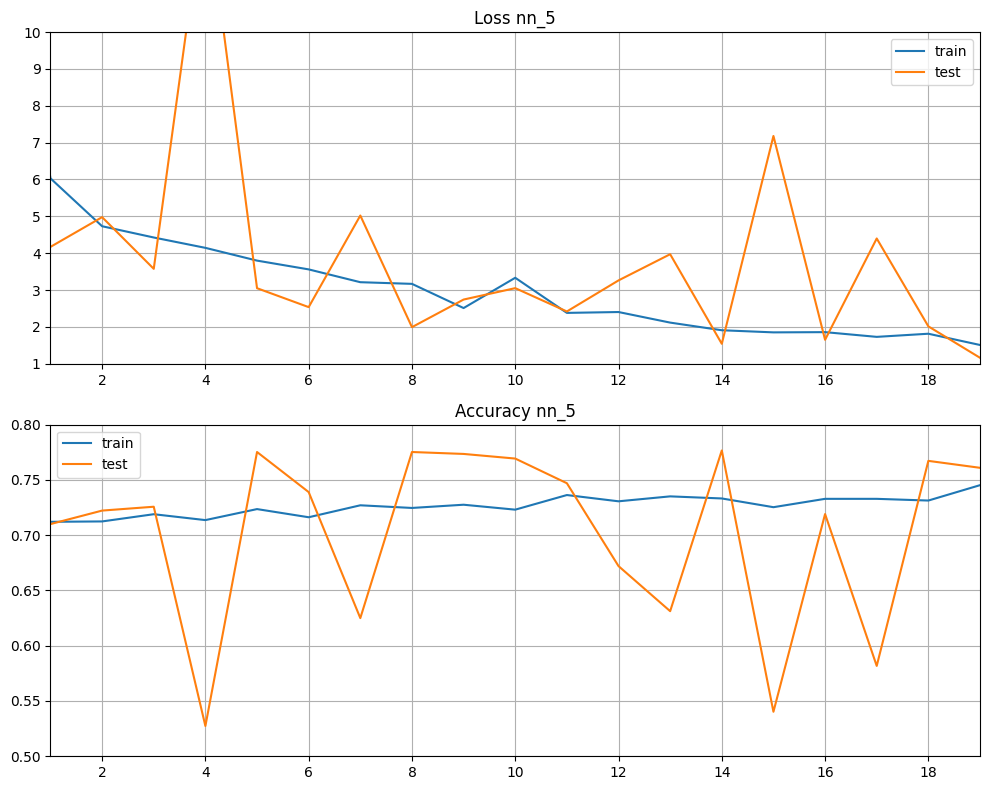

In [ ]:
show_loss_accuracy(history_5, 19, 1, 10, 0.5, 0.8, 'nn_5')

In [ ]:
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

nn_6 = create_neural_network(22, False, 30, 0, 0.001)
history_6 = nn_6.fit(X_22, y_22, validation_data=(test_22, y_test_22), epochs=50, batch_size=10, callbacks=[checkpoint])
nn_6 = keras.models.load_model(checkpoint_filepath)

Epoch 1/50
577/583 [============================>.] - ETA: 0s - loss: 29.5949 - accuracy: 0.6877
Epoch 1: val_accuracy improved from -inf to 0.66748, saving model to /tmp/ckpt/checkpoint.model.keras
583/583 [==============================] - 3s 3ms/step - loss: 29.3608 - accuracy: 0.6882 - val_loss: 5.3516 - val_accuracy: 0.6675
Epoch 2/50
569/583 [============================>.] - ETA: 0s - loss: 5.3887 - accuracy: 0.7146
Epoch 2: val_accuracy improved from 0.66748 to 0.76438, saving model to /tmp/ckpt/checkpoint.model.keras
583/583 [==============================] - 1s 2ms/step - loss: 5.3356 - accuracy: 0.7146 - val_loss: 3.4020 - val_accuracy: 0.7644
Epoch 3/50
565/583 [============================>.] - ETA: 0s - loss: 3.7717 - accuracy: 0.7101
Epoch 3: val_accuracy improved from 0.76438 to 0.78006, saving model to /tmp/ckpt/checkpoint.model.keras
583/583 [==============================] - 1s 2ms/step - loss: 3.8023 - accuracy: 0.7093 - val_loss: 3.0083 - val_accuracy: 0.7801
Epoch

In [ ]:
evaluate_nn(nn_6, X_22, y_22, test_22, y_test_22)

Train loss: 1.1962, Train accuracy: 0.7904
Test loss: 1.3563, Test accuracy: 0.7964


In [23]:
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

nn_7 = create_neural_network(22, True, 36, 12, 0.005)
history_7 = nn_7.fit(X_22, y_22, validation_data=(test_22, y_test_22), epochs=100, batch_size=30, callbacks=[checkpoint])
nn_7 = keras.models.load_model(checkpoint_filepath)

Epoch 1/100
181/195 [==========================>...] - ETA: 0s - loss: 20.2491 - accuracy: 0.6913
Epoch 1: val_accuracy improved from -inf to 0.62426, saving model to /tmp/ckpt/checkpoint.model.keras
195/195 [==============================] - 2s 4ms/step - loss: 19.1610 - accuracy: 0.6959 - val_loss: 12.3850 - val_accuracy: 0.6243
Epoch 2/100
195/195 [==============================] - ETA: 0s - loss: 7.9532 - accuracy: 0.6971
Epoch 2: val_accuracy improved from 0.62426 to 0.73022, saving model to /tmp/ckpt/checkpoint.model.keras
195/195 [==============================] - 1s 3ms/step - loss: 7.9532 - accuracy: 0.6971 - val_loss: 10.3717 - val_accuracy: 0.7302
Epoch 3/100
178/195 [==========================>...] - ETA: 0s - loss: 5.1511 - accuracy: 0.7213
Epoch 3: val_accuracy did not improve from 0.73022
195/195 [==============================] - 1s 3ms/step - loss: 5.0660 - accuracy: 0.7188 - val_loss: 10.5534 - val_accuracy: 0.5169
Epoch 4/100
183/195 [===========================>..] 

In [24]:
evaluate_nn(nn_7, X_22, y_22, test_22, y_test_22)

Train loss: 0.4996, Train accuracy: 0.7922
Test loss: 0.4997, Test accuracy: 0.8013


In [17]:
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

nn_8 = create_neural_network(22, True, 40, 20, 0.003)
history_8 = nn_8.fit(X_22, y_22, validation_data=(test_22, y_test_22), epochs=150, batch_size=25, callbacks=[checkpoint])
nn_8= keras.models.load_model(checkpoint_filepath)

Epoch 1/150
221/233 [===========================>..] - ETA: 0s - loss: 15.7007 - accuracy: 0.6858
Epoch 1: val_accuracy improved from -inf to 0.53782, saving model to /tmp/ckpt/checkpoint.model.keras
233/233 [==============================] - 2s 6ms/step - loss: 15.5071 - accuracy: 0.6829 - val_loss: 15.3634 - val_accuracy: 0.5378
Epoch 2/150
229/233 [============================>.] - ETA: 0s - loss: 6.0097 - accuracy: 0.7048
Epoch 2: val_accuracy improved from 0.53782 to 0.69397, saving model to /tmp/ckpt/checkpoint.model.keras
233/233 [==============================] - 1s 4ms/step - loss: 6.0213 - accuracy: 0.7042 - val_loss: 6.9227 - val_accuracy: 0.6940
Epoch 3/150
233/233 [==============================] - ETA: 0s - loss: 3.7920 - accuracy: 0.7005
Epoch 3: val_accuracy improved from 0.69397 to 0.74590, saving model to /tmp/ckpt/checkpoint.model.keras
233/233 [==============================] - 1s 5ms/step - loss: 3.7920 - accuracy: 0.7005 - val_loss: 2.9720 - val_accuracy: 0.7459
E

In [18]:
evaluate_nn(nn_8, X_22, y_22, test_22, y_test_22)

Train loss: 0.4266, Train accuracy: 0.7979
Test loss: 0.4346, Test accuracy: 0.8045


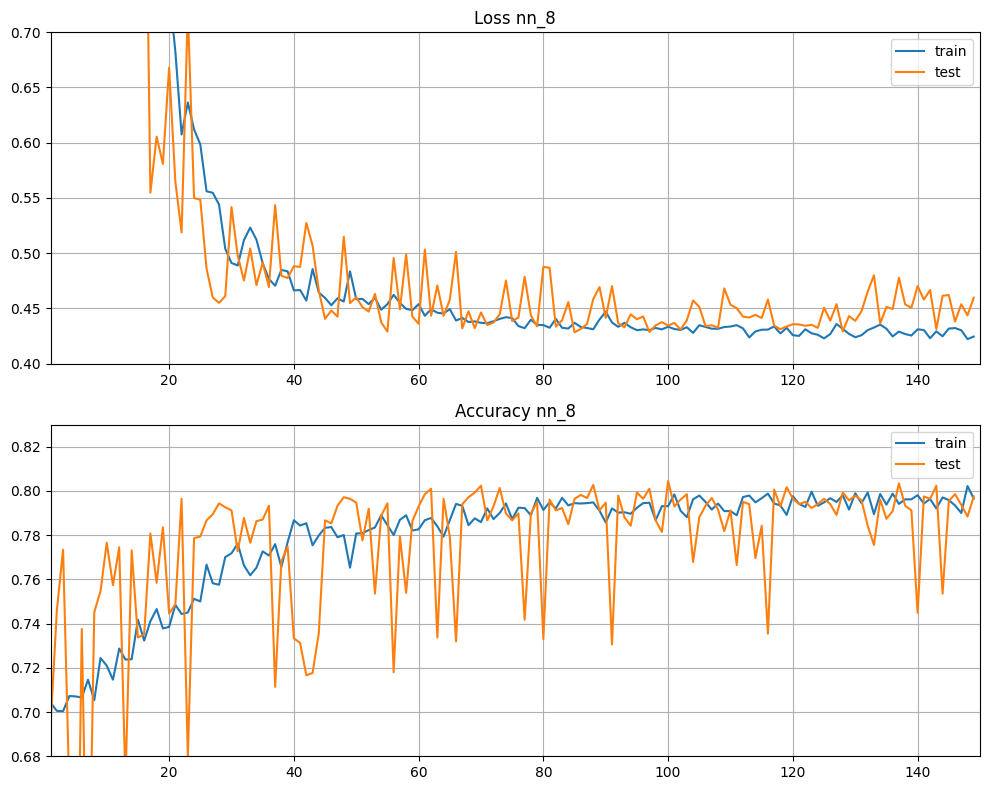

In [21]:
show_loss_accuracy(history_8, 150, 0.4, 0.7, 0.68, 0.83, 'nn_8')

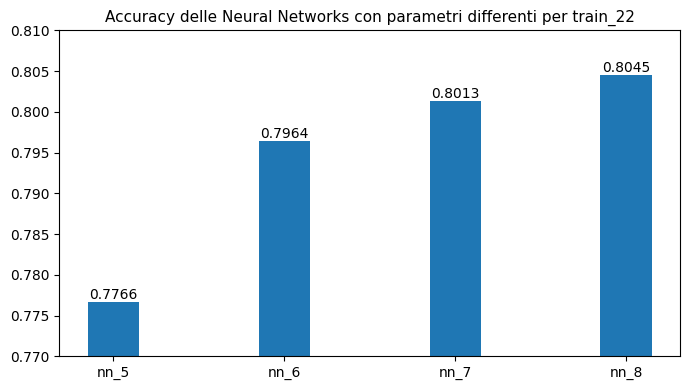

In [29]:
loss_nn5, acc_nn5 = nn_5.evaluate(test_22, y_test_22, verbose=0)
loss_nn6, acc_nn6 = nn_6.evaluate(test_22, y_test_22, verbose=0)
loss_nn7, acc_nn7 = nn_7.evaluate(test_22, y_test_22, verbose=0)
loss_nn8, acc_nn8 = nn_8.evaluate(test_22, y_test_22, verbose=0)

data_22 = [['nn_5',acc_nn5,loss_nn5], ['nn_6',acc_nn6,loss_nn6], ['nn_7',acc_nn7,loss_nn7], ['nn_8',acc_nn8,loss_nn8]]
df_nn_22 = pd.DataFrame(data_22, columns=['Type of NN', 'Accuracy', 'Loss'])

fig, ax = plt.subplots(figsize=(7,4))
bar_container = ax.bar(df_nn_22['Type of NN'], np.round(df_nn_22['Accuracy'],4), width=0.3)
ax.set_title(label='Accuracy delle Neural Networks con parametri differenti per train_22', fontsize=11)
ax.set_ylim(0.77, 0.81)
ax.bar_label(bar_container)

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "NN_acc_22.png")):
  plt.savefig(IMAGE_PATH + "NN_acc_22.png", format="png")

plt.show()

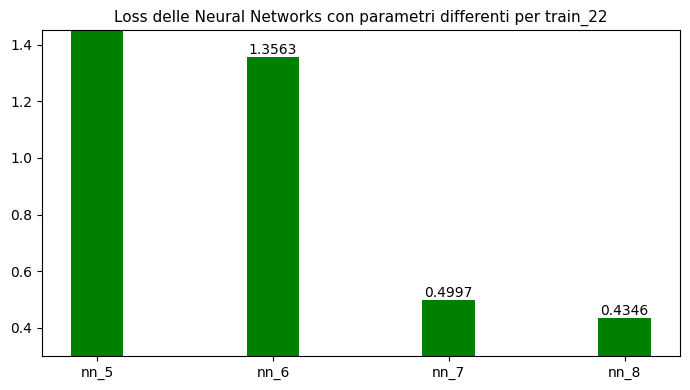

In [30]:
fig, ax = plt.subplots(figsize=(7,4))
bar_container = ax.bar(df_nn_22['Type of NN'], np.round(df_nn_22['Loss'],4), color='g', width=0.3)
ax.set_title(label='Loss delle Neural Networks con parametri differenti per train_22', fontsize=11)
ax.set_ylim(0.3, 1.45)
ax.bar_label(bar_container)

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "NN_loss_22.png")):
  plt.savefig(IMAGE_PATH + "NN_loss_22.png", format="png")

plt.show()

CONCLUSIONE per train_13: la Rete Neurale migliore è nn_8

Si verificano le migliori NN trovate per train_13 e train_22 con la cross validation e

si addestrano in modo definitivo, anche con gli attributi Service_use ed Expenses

In [ ]:
def nn_cross_validation(myModel, train_13, y_train_13, ep, bs):
  splits=5
  loss=0
  accuracy=0
  kfold = StratifiedKFold(n_splits = splits)

  for train, test in kfold.split(train_13, y_train_13):
    myModel.fit(train_13.iloc[train], y_train_13.iloc[train], validation_data=(train_13.iloc[test], y_train_13.iloc[test]),
                epochs=ep, batch_size=bs, verbose=0, callbacks=[checkpoint])
    myModel = keras.models.load_model(checkpoint_filepath)
    scores = myModel.evaluate(train_13.iloc[test], y_train_13.iloc[test], verbose=0)
    loss = loss + scores[0]
    accuracy = accuracy + scores[1]
    print("%s: %.4f, %s: %.4f" % (myModel.metrics_names[0], scores[0], myModel.metrics_names[1], scores[1]))

  print("\n")
  print("Average Cross Validation loss: %.4f" % (loss/splits))
  print("Average Cross Validation accuracy: %.4f" % (accuracy/splits))
  return np.round(accuracy/splits,4)

In [ ]:
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

print("Cross Validation on best NN for train_13\n")
best_nn_13_cv = create_neural_network(13, True, 40, 20, 0.003)
mean_acc_13 = nn_cross_validation(best_nn_13_cv, train_13, y_train_13, 150, 30)

Cross Validation on best NN for train_13

loss: 0.6677, accuracy: 79.18%
loss: 0.4417, accuracy: 77.98%
loss: 0.4552, accuracy: 79.93%
loss: 0.4316, accuracy: 81.42%
loss: 0.3954, accuracy: 81.07%


Average Cross Validation loss: 0.4783
Average Cross Validation accuracy: 0.7992


In [ ]:
best_nn_13 = create_neural_network(13, True, 40, 20, 0.003)
best_nn_13.fit(train_13, y_train_13, epochs=150, batch_size=30)

Epoch 1/150
290/290 [==============================] - 2s 3ms/step - loss: 9.9495 - accuracy: 0.6891
Epoch 2/150
290/290 [==============================] - 1s 3ms/step - loss: 2.6803 - accuracy: 0.7163
Epoch 3/150
290/290 [==============================] - 1s 3ms/step - loss: 2.1409 - accuracy: 0.7238
Epoch 4/150
290/290 [==============================] - 1s 2ms/step - loss: 1.4311 - accuracy: 0.7239
Epoch 5/150
290/290 [==============================] - 1s 2ms/step - loss: 0.7712 - accuracy: 0.7088
Epoch 6/150
290/290 [==============================] - 1s 2ms/step - loss: 0.6142 - accuracy: 0.7444
Epoch 7/150
290/290 [==============================] - 1s 2ms/step - loss: 0.5459 - accuracy: 0.7728
Epoch 8/150
290/290 [==============================] - 1s 2ms/step - loss: 0.5238 - accuracy: 0.7758
Epoch 9/150
290/290 [==============================] - 1s 2ms/step - loss: 0.5244 - accuracy: 0.7732
Epoch 10/150
290/290 [==============================] - 1s 2ms/step - loss: 0.5148 - accura

In [ ]:
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

print("Cross Validation on best NN for train_22\n")
best_nn_22_cv = create_neural_network(22, True, 40, 20, 0.003)
mean_acc_22 = nn_cross_validation(best_nn_22_cv, train_22, y_train_13, 150, 25)

Cross Validation on best NN for train_22

loss: 0.6616, accuracy: 0.7895
loss: 0.4816, accuracy: 0.7941
loss: 0.4389, accuracy: 0.8097
loss: 0.4349, accuracy: 0.8170
loss: 0.4071, accuracy: 0.8067


Average Cross Validation loss: 0.4848
Average Cross Validation accuracy: 0.8034


In [ ]:
best_nn_22 = create_neural_network(22, True, 40, 20, 0.003)
best_nn_22.fit(train_22, y_train_22, epochs=150, batch_size=25)

Epoch 1/150
348/348 [==============================] - 1s 2ms/step - loss: 14.4271 - accuracy: 0.6962
Epoch 2/150
348/348 [==============================] - 1s 2ms/step - loss: 5.6331 - accuracy: 0.7026
Epoch 3/150
348/348 [==============================] - 1s 3ms/step - loss: 4.1907 - accuracy: 0.7087
Epoch 4/150
348/348 [==============================] - 1s 3ms/step - loss: 4.2626 - accuracy: 0.7047
Epoch 5/150
348/348 [==============================] - 1s 3ms/step - loss: 3.7118 - accuracy: 0.7200
Epoch 6/150
348/348 [==============================] - 1s 2ms/step - loss: 2.8498 - accuracy: 0.7126
Epoch 7/150
348/348 [==============================] - 1s 2ms/step - loss: 2.2110 - accuracy: 0.7262
Epoch 8/150
348/348 [==============================] - 1s 2ms/step - loss: 1.9572 - accuracy: 0.7210
Epoch 9/150
348/348 [==============================] - 1s 2ms/step - loss: 2.5935 - accuracy: 0.7137
Epoch 10/150
348/348 [==============================] - 1s 2ms/step - loss: 1.5433 - accur

Addestramento train_13 con aggiunta di Service_use ed Expenses

In [ ]:
train_14 = train_13.copy()
train_14['Service_use'] = 0
train_14['Service_use']  = train_14['VRDeck'] + train_14['RoomService'] + train_14['FoodCourt'] + train_14['ShoppingMall'] + train_14['Spa'] != 0.0
train_14['Service_use'] = train_14['Service_use'].astype(int)

checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

print("Cross Validation on best NN for train_13 con Service_use\n")
best_nn_14_cv = create_neural_network(14, True, 40, 20, 0.003)
mean_acc_14 = nn_cross_validation(best_nn_14_cv, train_14, y_train_13, 150, 30)

Cross Validation on best NN for train_13 con Service_use

loss: 0.8178, accuracy: 0.7775
loss: 0.4584, accuracy: 0.7924
loss: 0.4583, accuracy: 0.7987
loss: 0.4258, accuracy: 0.8193
loss: 0.3981, accuracy: 0.8072


Average Cross Validation loss: 0.5117
Average Cross Validation accuracy: 0.7990


In [ ]:
best_nn_14 = create_neural_network(14, True, 40, 20, 0.003)
best_nn_14.fit(train_14, y_train_13, epochs=150, batch_size=30)

Epoch 1/150
290/290 [==============================] - 1s 2ms/step - loss: 11.1479 - accuracy: 0.6825
Epoch 2/150
290/290 [==============================] - 1s 2ms/step - loss: 4.2366 - accuracy: 0.6979
Epoch 3/150
290/290 [==============================] - 1s 2ms/step - loss: 3.2829 - accuracy: 0.7083
Epoch 4/150
290/290 [==============================] - 1s 2ms/step - loss: 3.7714 - accuracy: 0.6955
Epoch 5/150
290/290 [==============================] - 1s 3ms/step - loss: 2.8506 - accuracy: 0.7070
Epoch 6/150
290/290 [==============================] - 1s 3ms/step - loss: 2.2207 - accuracy: 0.7140
Epoch 7/150
290/290 [==============================] - 1s 3ms/step - loss: 1.8897 - accuracy: 0.7170
Epoch 8/150
290/290 [==============================] - 1s 3ms/step - loss: 1.8938 - accuracy: 0.7161
Epoch 9/150
290/290 [==============================] - 1s 2ms/step - loss: 1.7933 - accuracy: 0.7208
Epoch 10/150
290/290 [==============================] - 1s 2ms/step - loss: 1.2751 - accur

In [ ]:
train_15 = train_14.copy()
train_15['Expenses']  = train_15['VRDeck'] + train_15['RoomService'] + train_15['FoodCourt'] + train_15['ShoppingMall'] + train_15['Spa']

checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

print("Cross Validation on best NN for train_13 con Service_use ed Expenses\n")
best_nn_15_cv = create_neural_network(15, True, 40, 20, 0.003)
mean_acc_15 = nn_cross_validation(best_nn_15_cv, train_15, y_train_13, 150, 30)

Cross Validation on best NN for train_13 con Service_use ed Expenses

loss: 0.5629, accuracy: 0.7924
loss: 0.4323, accuracy: 0.7792
loss: 0.4504, accuracy: 0.8028
loss: 0.4208, accuracy: 0.8234
loss: 0.3959, accuracy: 0.8084


Average Cross Validation loss: 0.4525
Average Cross Validation accuracy: 0.8012


In [ ]:
best_nn_15 = create_neural_network(15, True, 40, 20, 0.003)
best_nn_15.fit(train_15, y_train_13, epochs=150, batch_size=30)

Epoch 1/150
290/290 [==============================] - 1s 2ms/step - loss: 22.4106 - accuracy: 0.6995
Epoch 2/150
290/290 [==============================] - 1s 2ms/step - loss: 11.2523 - accuracy: 0.7044
Epoch 3/150
290/290 [==============================] - 1s 2ms/step - loss: 9.2970 - accuracy: 0.7085
Epoch 4/150
290/290 [==============================] - 1s 2ms/step - loss: 5.4946 - accuracy: 0.7231
Epoch 5/150
290/290 [==============================] - 1s 2ms/step - loss: 4.7098 - accuracy: 0.7140
Epoch 6/150
290/290 [==============================] - 1s 2ms/step - loss: 4.9410 - accuracy: 0.7116
Epoch 7/150
290/290 [==============================] - 1s 2ms/step - loss: 4.2586 - accuracy: 0.7164
Epoch 8/150
290/290 [==============================] - 1s 3ms/step - loss: 3.7870 - accuracy: 0.7075
Epoch 9/150
290/290 [==============================] - 1s 3ms/step - loss: 2.8341 - accuracy: 0.7274
Epoch 10/150
290/290 [==============================] - 1s 3ms/step - loss: 3.1494 - accu

Addestramento train_22 con aggiunta di Service_use ed Expenses

In [ ]:
train_23 = train_22.copy()
train_23['Service_use'] = 0
train_23['Service_use']  = train_23['VRDeck'] + train_23['RoomService'] + train_23['FoodCourt'] + train_23['ShoppingMall'] + train_23['Spa'] != 0.0
train_23['Service_use'] = train_23['Service_use'].astype(int)

checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

print("Cross Validation on best NN for train_22 con Service_use\n")
best_nn_23_cv = create_neural_network(23, True, 40, 20, 0.003)
mean_acc_23 = nn_cross_validation(best_nn_23_cv, train_23, y_train_22, 150, 25)

Cross Validation on best NN for train_22 con Service_use

loss: 0.6505, accuracy: 0.7849
loss: 0.4683, accuracy: 0.7872
loss: 0.4617, accuracy: 0.7924
loss: 0.4467, accuracy: 0.8136
loss: 0.4288, accuracy: 0.7940


Average Cross Validation loss: 0.4912
Average Cross Validation accuracy: 0.7944


In [ ]:
best_nn_23 = create_neural_network(23, True, 40, 20, 0.003)
best_nn_23.fit(train_23, y_train_22, epochs=150, batch_size=25)

Epoch 1/150
348/348 [==============================] - 2s 2ms/step - loss: 13.0555 - accuracy: 0.6940
Epoch 2/150
348/348 [==============================] - 1s 2ms/step - loss: 6.8272 - accuracy: 0.6988
Epoch 3/150
348/348 [==============================] - 1s 2ms/step - loss: 4.6090 - accuracy: 0.7201
Epoch 4/150
348/348 [==============================] - 1s 2ms/step - loss: 3.7551 - accuracy: 0.7077
Epoch 5/150
348/348 [==============================] - 1s 2ms/step - loss: 3.3281 - accuracy: 0.7289
Epoch 6/150
348/348 [==============================] - 1s 2ms/step - loss: 2.9734 - accuracy: 0.7216
Epoch 7/150
348/348 [==============================] - 1s 2ms/step - loss: 2.4836 - accuracy: 0.7269
Epoch 8/150
348/348 [==============================] - 1s 2ms/step - loss: 2.6104 - accuracy: 0.7141
Epoch 9/150
348/348 [==============================] - 1s 2ms/step - loss: 1.3974 - accuracy: 0.7399
Epoch 10/150
348/348 [==============================] - 1s 2ms/step - loss: 1.6363 - accur

In [ ]:
train_24 = train_23.copy()
train_24['Expenses']  = train_24['VRDeck'] + train_24['RoomService'] + train_24['FoodCourt'] + train_24['ShoppingMall'] + train_24['Spa']

checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

print("Cross Validation on best NN for train_22 con Service_use ed Expenses\n")
best_nn_24_cv = create_neural_network(24, True, 40, 20, 0.003)
mean_acc_24 = nn_cross_validation(best_nn_24_cv, train_24, y_train_22, 150, 25)

Cross Validation on best NN for train_22 con Service_use ed Expenses

loss: 0.8804, accuracy: 0.7884
loss: 0.4433, accuracy: 0.7953
loss: 0.4185, accuracy: 0.8160
loss: 0.4515, accuracy: 0.8228
loss: 0.4241, accuracy: 0.8055


Average Cross Validation loss: 0.5235
Average Cross Validation accuracy: 0.8056


In [ ]:
best_nn_24 = create_neural_network(24, True, 40, 20, 0.003)
best_nn_24.fit(train_24, y_train_22, epochs=150, batch_size=25)

Epoch 1/150
348/348 [==============================] - 2s 3ms/step - loss: 15.1310 - accuracy: 0.6976
Epoch 2/150
348/348 [==============================] - 1s 2ms/step - loss: 4.0869 - accuracy: 0.7138
Epoch 3/150
348/348 [==============================] - 1s 2ms/step - loss: 4.2644 - accuracy: 0.7159
Epoch 4/150
348/348 [==============================] - 1s 2ms/step - loss: 2.5804 - accuracy: 0.7283
Epoch 5/150
348/348 [==============================] - 1s 2ms/step - loss: 2.7423 - accuracy: 0.7151
Epoch 6/150
348/348 [==============================] - 1s 2ms/step - loss: 1.9785 - accuracy: 0.7260
Epoch 7/150
348/348 [==============================] - 1s 2ms/step - loss: 1.8473 - accuracy: 0.7190
Epoch 8/150
348/348 [==============================] - 1s 2ms/step - loss: 1.3737 - accuracy: 0.7283
Epoch 9/150
348/348 [==============================] - 1s 2ms/step - loss: 0.9409 - accuracy: 0.7307
Epoch 10/150
348/348 [==============================] - 1s 2ms/step - loss: 1.0102 - accur

KAGGLE SUBMISSION

In [ ]:
def generateSubmission(myModel, testFile, add_service_use, add_expenses, submissionFile, description):
    # Read the test data
    X_test = pd.read_csv(DATA_PATH + testFile)
    Id = X_test.PassengerId
    X_test = X_test.drop(columns=['Unnamed: 0', 'PassengerId'])

    if(add_service_use):
      X_test['Service_use'] = 0
      X_test['Service_use']  = X_test['VRDeck'] + X_test['RoomService'] + X_test['FoodCourt'] + X_test['ShoppingMall'] + X_test['Spa'] != 0.0
      X_test['Service_use'] = X_test['Service_use'].astype(int)
    if(add_expenses):
      X_test['Expenses']  = X_test['VRDeck'] + X_test['RoomService'] + X_test['FoodCourt'] + X_test['ShoppingMall'] + X_test['Spa']

    # Use the model to make predictions
    y_test_pred = myModel.predict(X_test)
    for i in range(0,len(y_test_pred)-1):
      if(y_test_pred[i] > 0.5):
        y_test_pred[i] = 1
      else:
        y_test_pred[i] = 0

    y_test_pred = y_test_pred.astype(bool).reshape(len(y_test_pred))

    # submission file
    my_submission = pd.DataFrame({"PassengerId": Id, "Transported": y_test_pred})

    if not os.path.exists(OUTPUT_PATH):
      os.mkdir(OUTPUT_PATH)

    # you could use any filename. We choose submission here
    my_submission.to_csv(OUTPUT_PATH + submissionFile, index=False)

    # Submit authomatically; kaggle API authentication needed
    !kaggle competitions submit -c spaceship-titanic -f {OUTPUT_PATH + submissionFile} -m '{description}'

In [ ]:
generateSubmission(best_nn_24, True, True, "test_22.csv", "Neural_network_6.csv", "Miglior configurazione trovata per il training con 22 attributi + Expenses")

134/134 [==============================] - 0s 2ms/step
100% 56.2k/56.2k [00:01<00:00, 34.6kB/s]
Successfully submitted to Spaceship Titanic

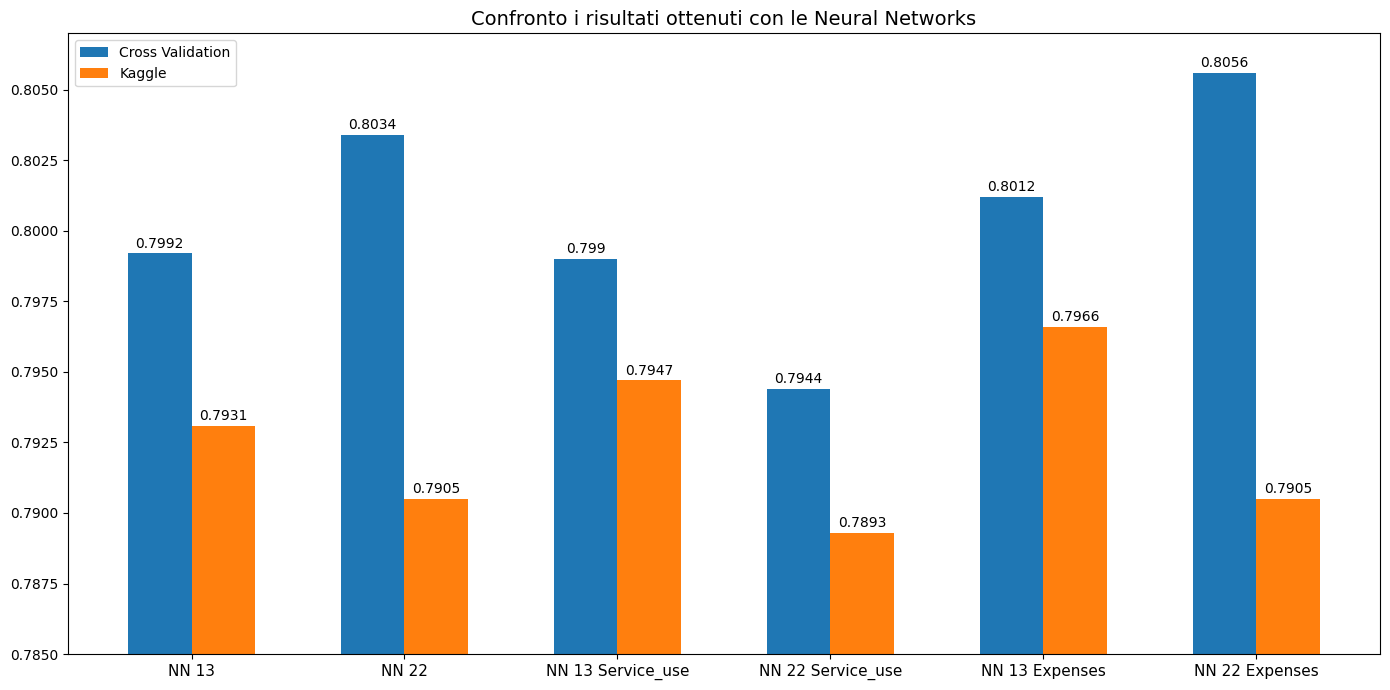

In [ ]:
classifers = ('NN 13', 'NN 22', 'NN 13 Service_use', 'NN 22 Service_use', 'NN 13 Expenses', 'NN 22 Expenses')
scores = {
    'Cross Validation': (0.7992, 0.8034, 0.7990, 0.7944, 0.8012, 0.8056),
    'Kaggle': (0.7931, 0.7905, 0.7947, 0.7893, 0.7966, 0.7905)
}

x = np.arange(len(classifers))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(14,7))

for attribute, score in scores.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, score, width, label=attribute)
  ax.bar_label(rects, padding=2)
  multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Confronto i risultati ottenuti con le Neural Networks', fontsize=14)
ax.set_ylim(0.785, 0.807)
ax.set_xticks(x+ width/2, classifers, fontsize=11)
ax.legend()

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "NN_Risultati.png")):
  plt.savefig(IMAGE_PATH + "NN_Risultati.png", format="png")

plt.show()